In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [164]:
# Data Preparation
x_train, x_val_tes, y_train, y_val_tes = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_tes, y_val_tes, test_size=0.5)
# Training
X_train = torch.Tensor(x_train.values)
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 1, X_train.shape[1])
Y_train = torch.Tensor(y_train.values)
Y_train_cnn = Y_train.reshape(Y_train.shape[0], 1)
# Validation
X_val = torch.Tensor(x_val.values)
X_val_cnn = X_val.reshape(X_val.shape[0], 1, 1, X_val.shape[1])
Y_val = torch.Tensor(y_val.values)
Y_val_cnn = Y_val.reshape(Y_val.shape[0], 1)
# Testing
X_test = torch.Tensor(x_test.values)
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 1, X_test.shape[1])
Y_test = torch.Tensor(y_test.values)
Y_test_cnn = Y_test.reshape(Y_test.shape[0], 1)
# Training Loader
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=10, shuffle=True)
train_loader_cnn = DataLoader(TensorDataset(X_train, Y_train), batch_size=1, shuffle=True)

In [165]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, 2)
        self.activation1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(16, 32, 2)
        self.activation2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(2)
        self.conv3 = nn.Conv1d(32, 64, 2)
        self.activation3 = nn.ReLU()
        self.linear1 = nn.Linear(64*14, 120)
        self.activation4 = nn.ReLU()
        self.linear2 = nn.Linear(120, 84)
        self.activation5 = nn.ReLU()
        self.linear3 = nn.Linear(84, 1)
        self.sigmoid = nn.Sigmoid()
        
    
    def forward(self, x):
        output = self.conv1(x)
        output = self.activation1(output)
        output = self.pool1(output)
        output = self.conv2(output)
        output = self.activation2(output)
        output = self.pool2(output)
        output = self.conv3(output)
        output = self.activation3(output)
        
        output = output.view(-1, 64*14)
        output = self.linear1(output)
        output = self.activation4(output)
        output = self.linear2(output)
        output = self.activation5(output)
        output = self.linear3(output)
        output = self.sigmoid(output)
        
        return output
    
network = MyCNN()
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [166]:
epochs = 1000
final_loss = []
for epoch in range(epochs):
    running_loss = 0.

    for data in train_loader_cnn:
        inputs, outputs = data
        optimizer.zero_grad()

        predictions = network(inputs)
        loss = loss_function(predictions, outputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    final_loss.append(running_loss/len(train_loader))
    print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

RuntimeError: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size

In [89]:
class MyModel(nn.Module):
    def __init__(self, input_features, dim1, dim2, output_features):
        super(MyModel, self).__init__()
#         self.conv1 = nn.Conv2d(2, 6, 5, padding=2)
#         self.activation0 = nn.ReLU()
        self.linear1 = nn.Linear(input_features, dim1, bias=False)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(dim1, dim2)
        self.activation2 = nn.ReLU()
        self.linear3 = nn.Linear(dim2, output_features)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
#         output = self.conv1(x)
#         output = self.activation0(output)
        output = self.linear1(x)
        output = self.activation1(output)
        output = self.linear2(output)
        output = self.activation2(output)
        output = self.linear3(output)
        output = self.sigmoid(output)
        return output
    
network = MyModel(8, 5, 3, 1)

In [90]:
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [91]:
epochs = 1000
final_loss = []
for epoch in range(epochs):
    running_loss = 0.

    for data in train_loader:
        inputs, outputs = data
        optimizer.zero_grad()

        predictions = network(inputs)
        loss = loss_function(predictions, outputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    final_loss.append(running_loss/len(train_loader))
    print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

Epoch   1: loss 0.77033
Epoch   2: loss 0.75024
Epoch   3: loss 0.70348
Epoch   4: loss 0.63899
Epoch   5: loss 0.57690
Epoch   6: loss 0.53353
Epoch   7: loss 0.51066
Epoch   8: loss 0.49695
Epoch   9: loss 0.48563
Epoch  10: loss 0.47929
Epoch  11: loss 0.47945
Epoch  12: loss 0.47570
Epoch  13: loss 0.46711
Epoch  14: loss 0.46326
Epoch  15: loss 0.46257
Epoch  16: loss 0.46343
Epoch  17: loss 0.45970
Epoch  18: loss 0.45534
Epoch  19: loss 0.45294
Epoch  20: loss 0.44979
Epoch  21: loss 0.44853
Epoch  22: loss 0.44447
Epoch  23: loss 0.44828
Epoch  24: loss 0.44504
Epoch  25: loss 0.44558
Epoch  26: loss 0.44012
Epoch  27: loss 0.44255
Epoch  28: loss 0.43959
Epoch  29: loss 0.43636
Epoch  30: loss 0.43781
Epoch  31: loss 0.43782
Epoch  32: loss 0.43563
Epoch  33: loss 0.43629
Epoch  34: loss 0.43380
Epoch  35: loss 0.43076
Epoch  36: loss 0.42667
Epoch  37: loss 0.43060
Epoch  38: loss 0.42959
Epoch  39: loss 0.42982
Epoch  40: loss 0.42637
Epoch  41: loss 0.43309
Epoch  42: loss 

Epoch 347: loss 0.32621
Epoch 348: loss 0.33115
Epoch 349: loss 0.32661
Epoch 350: loss 0.32780
Epoch 351: loss 0.32962
Epoch 352: loss 0.32440
Epoch 353: loss 0.32567
Epoch 354: loss 0.32588
Epoch 355: loss 0.32898
Epoch 356: loss 0.32983
Epoch 357: loss 0.32812
Epoch 358: loss 0.32463
Epoch 359: loss 0.32589
Epoch 360: loss 0.32894
Epoch 361: loss 0.32761
Epoch 362: loss 0.32463
Epoch 363: loss 0.32755
Epoch 364: loss 0.32467
Epoch 365: loss 0.32682
Epoch 366: loss 0.32323
Epoch 367: loss 0.32344
Epoch 368: loss 0.32674
Epoch 369: loss 0.32365
Epoch 370: loss 0.32673
Epoch 371: loss 0.32422
Epoch 372: loss 0.32483
Epoch 373: loss 0.32399
Epoch 374: loss 0.32488
Epoch 375: loss 0.32276
Epoch 376: loss 0.32392
Epoch 377: loss 0.32203
Epoch 378: loss 0.32643
Epoch 379: loss 0.32428
Epoch 380: loss 0.32605
Epoch 381: loss 0.32038
Epoch 382: loss 0.32367
Epoch 383: loss 0.32352
Epoch 384: loss 0.31856
Epoch 385: loss 0.31989
Epoch 386: loss 0.32561
Epoch 387: loss 0.31880
Epoch 388: loss 

Epoch 690: loss 0.30727
Epoch 691: loss 0.30765
Epoch 692: loss 0.30855
Epoch 693: loss 0.30625
Epoch 694: loss 0.30727
Epoch 695: loss 0.30679
Epoch 696: loss 0.31133
Epoch 697: loss 0.30835
Epoch 698: loss 0.30695
Epoch 699: loss 0.31421
Epoch 700: loss 0.30794
Epoch 701: loss 0.31173
Epoch 702: loss 0.30742
Epoch 703: loss 0.30868
Epoch 704: loss 0.31009
Epoch 705: loss 0.30755
Epoch 706: loss 0.30713
Epoch 707: loss 0.30848
Epoch 708: loss 0.30941
Epoch 709: loss 0.30677
Epoch 710: loss 0.31389
Epoch 711: loss 0.31063
Epoch 712: loss 0.30964
Epoch 713: loss 0.30633
Epoch 714: loss 0.30743
Epoch 715: loss 0.31074
Epoch 716: loss 0.30931
Epoch 717: loss 0.31524
Epoch 718: loss 0.31041
Epoch 719: loss 0.30647
Epoch 720: loss 0.30779
Epoch 721: loss 0.30975
Epoch 722: loss 0.31281
Epoch 723: loss 0.30897
Epoch 724: loss 0.31286
Epoch 725: loss 0.31208
Epoch 726: loss 0.30780
Epoch 727: loss 0.30711
Epoch 728: loss 0.31030
Epoch 729: loss 0.30987
Epoch 730: loss 0.30791
Epoch 731: loss 

Text(0, 0.5, 'Epochs')

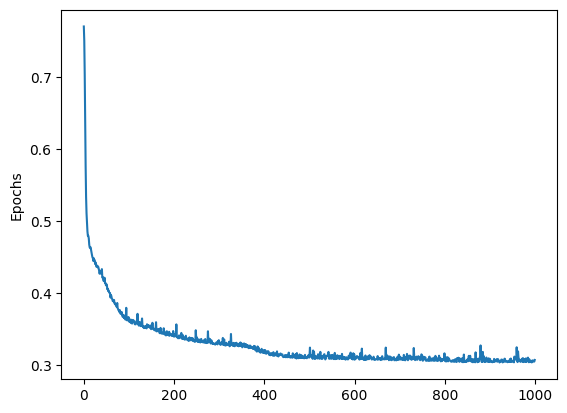

In [92]:
#plot the loss function
plt.plot(range(epochs),final_loss)
plt.ylabel('Loss')
plt.ylabel('Epochs')

In [58]:
running_loss

0.002316515472437164

In [93]:
predictions = network.forward(X_test)
predictions = (predictions >= 0.5)
accuracy_score(Y_test, predictions.detach().numpy())

0.922077922077922

In [94]:
predictions = network.forward(X_val)
predictions = (predictions >= 0.5)
accuracy_score(Y_val, predictions.detach().numpy())

0.8311688311688312

In [81]:
fpr, tpr, threshold = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)

AUC for our classifier is: 0.7971342383107088


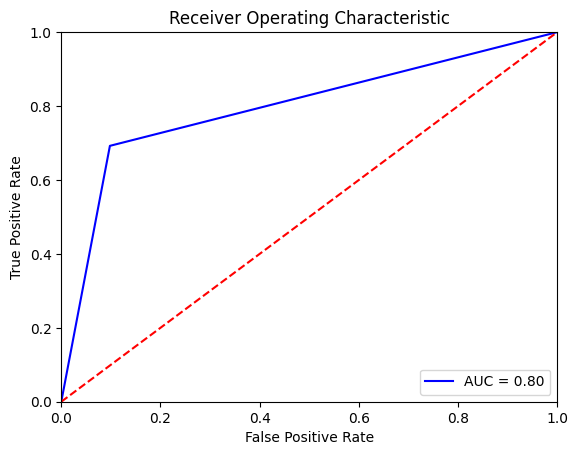

In [82]:
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split

# Download dataset from github
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

file_url = 'https://raw.githubusercontent.com/xinxiewu/datasets/main/pima_indians_diabetes.csv'
df = pd.read_csv(download_file(file_url))

# Diabetes Group
df.loc[(df['diabetes'] == 1) & (df['glucose'] == 0), 'glucose'] = 140
df.loc[(df['diabetes'] == 1) & (df['bp'] == 0), 'bp'] = 74
df.loc[(df['diabetes'] == 1) & (df['skin_thick'] == 0), 'skin_thick'] = 27
df.loc[(df['diabetes'] == 1) & (df['insulin'] == 0), 'insulin'] = 100
df.loc[(df['diabetes'] == 1) & (df['bmi'] == 0), 'bmi'] = 34.25
df.loc[(df['diabetes'] == 1) & (df['pedigree'] == 0), 'pedigree'] = 0.449
# Non-Diabetes Group
df.loc[(df['diabetes'] == 0) & (df['glucose'] == 0), 'glucose'] = 107
df.loc[(df['diabetes'] == 0) & (df['bp'] == 0), 'bp'] = 70
df.loc[(df['diabetes'] == 0) & (df['skin_thick'] == 0), 'skin_thick'] = 21
df.loc[(df['diabetes'] == 0) & (df['insulin'] == 0), 'insulin'] = 68.792
df.loc[(df['diabetes'] == 0) & (df['bmi'] == 0), 'bmi'] = 30.05
df.loc[(df['diabetes'] == 0) & (df['pedigree'] == 0), 'pedigree'] = 0.336

# Normalization
df.preg = (df.preg - df.preg.mean())/df.preg.std()
df.glucose = (df.glucose - df.glucose.mean())/df.glucose.std()
df.bp = (df.bp - df.bp.mean())/df.bp.std()
df.skin_thick = (df.skin_thick - df.skin_thick.mean())/df.skin_thick.std()
df.insulin = (df.insulin - df.insulin.mean())/df.insulin.std()
df.bmi = (df.bmi - df.bmi.mean())/df.bmi.std()
df.pedigree = (df.pedigree - df.pedigree.mean())/df.pedigree.std()
df.age = (df.age - df.age.mean())/df.age.std()

# 7:3 Data Split
x = df.iloc[:, 0:8]
y = df.iloc[:, 8:9]